In [1]:
# Predicting Mobile Phone Selling Prices

# Table of Contents

# 1. Introduction
#     1.1 Dataset Source
#     1.2 Dataset Details
#     1.3 Dataset Features
#     1.4 Target Feature

# 2. Goals & Objectives

# 3. Data Cleaning & Preprocessing
#     3.1 Handling Missing Values
#     3.2 Outlier Detection and Treatment
#     3.3 Dropping Irrelevant Features
#     3.4 Data Aggregation (if required)

# 4. Data Exploration & Visualisation
#     4.1 One-variable plots
#     4.2 Two-variable plots
#     4.3 Three-variable plots

# 5. Literature Review (Advanced Submission Mode Only)
# 6. Summary & Conclusions
# 7. References


# Dataset Source:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

# Load the dataset
sales = pd.read_csv('Sales.csv')

# Display 10 random observations
sales.sample(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
1058,Lenovo,A5000,White,1 GB,8 GB,Yes,4.0,9999,9999,Lenovo A5000,0,0.000000
3054,Apple,iPhone 7,Red,2 GB,256 GB,Yes,4.7,74400,74400,Apple iPhone 7,0,0.000000
298,Apple,iPhone 11,Red,4GB,128 GB,Yes,4.6,54900,54900,Apple iPhone 11,0,0.000000
1175,realme,8 Pro,Illuminating Yellow,8 GB,128 GB,Yes,4.4,19999,21999,realme 8 Pro,2000,9.091322
872,Lenovo,Vibe S1,Dark Blue,3 GB,32 GB,Yes,NaN,13490,13490,Lenovo Vibe S1,0,0.000000
2275,Lenovo,K9 Note,Black,4 GB,64 GB,Yes,4.1,11999,11999,Lenovo K9 Note,0,0.000000
250,Apple,iPhone 7 Plus,Rose Gold,3 GB,32 GB,Yes,4.5,36999,37900,Apple iPhone 7 Plus,901,2.377309
334,GIONEE,M7 Power,Blue,4 GB,64 GB,Yes,4.1,9250,9250,GIONEE M7 Power,0,0.000000
32,SAMSUNG,Galaxy Note 9,Midnight Black,8 GB,512 GB,Yes,4.6,49999,49999,SAMSUNG Galaxy Note 9,0,0.000000
2746,OPPO,A15,Dynamic Black,2 GB,32 GB,Yes,4.0,8990,10990,OPPO A15,2000,18.198362


In [4]:
# Task 1.3: Dataset Features

from tabulate import tabulate

table = [['Name', 'Data Type', 'Units', 'Description'],
         ['Brands', 'Nominal categorical', 'NA', 'Mobile phone manufacturer or brand name'],
         ['Models', 'Nominal categorical', 'NA', 'Specific model name of the smartphone'],
         ['Colors', 'Nominal categorical', 'NA', 'Color variant of the smartphone'],
         ['Memory', 'Nominal categorical', 'GB', 'Amount of RAM in the smartphone'],
         ['Storage', 'Nominal categorical', 'GB', 'Internal storage capacity of the smartphone'],
         ['Camera', 'Binary categorical', 'NA', 'Presence of camera (Yes or No)'],
         ['Rating', 'Numeric', 'Rating scale (0-5)', 'Customer rating of the smartphone'],
         ['Original Price', 'Numeric', 'Currency units', 'Original listed price before discount'],
         ['Discount', 'Numeric', 'Currency units', 'Amount of discount provided on the original price'],
         ['discount percentage', 'Numeric', 'Percentage (%)', 'Percentage discount from original price']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



# Note:
# The feature "Mobile" is a combination of "Brands" and "Models" and may be redundant. You might consider dropping it during preprocessing. Additionally, the feature "Selling Price" will be used as your target variable, hence it's intentionally not included in this table.

╒═════════════════════╤═════════════════════╤════════════════════╤═══════════════════════════════════════════════════╕
│ Name                │ Data Type           │ Units              │ Description                                       │
╞═════════════════════╪═════════════════════╪════════════════════╪═══════════════════════════════════════════════════╡
│ Brands              │ Nominal categorical │ NA                 │ Mobile phone manufacturer or brand name           │
├─────────────────────┼─────────────────────┼────────────────────┼───────────────────────────────────────────────────┤
│ Models              │ Nominal categorical │ NA                 │ Specific model name of the smartphone             │
├─────────────────────┼─────────────────────┼────────────────────┼───────────────────────────────────────────────────┤
│ Colors              │ Nominal categorical │ NA                 │ Color variant of the smartphone                   │
├─────────────────────┼─────────────────────┼───

In [5]:
# Task 1.4: Target Feature

# Target Feature:

# Feature Name: Selling Price

# Type: Numerical (Regression Problem)

# Description:
# The Selling Price represents the final price at which the mobile phones were actually sold. This feature is numeric and continuous, making it ideal for regression analysis. The primary goal of the analysis will be to accurately predict the selling price of mobile phones based on their features, specifications, and market factors included in the dataset.

In [6]:
# Task 2: Goals & Objectives

# Goals & Objectives

# The primary goal of this project is to build a predictive model that can estimate the selling price of a mobile phone based on its technical specifications, brand, user ratings, and other descriptive attributes.

# This goal is supported by the following key objectives:

# 1. Data Understanding & Preprocessing:
#     Explore and understand the structure and contents of the dataset.
#     Clean and preprocess the data to handle missing values and inconsistencies.
#     Prepare the dataset for machine learning model development.

# 2. Exploratory Data Analysis (EDA):
#     Visualize and analyze patterns in the data using one-variable, two-variable, and three-variable plots.
#     Gain insights into the relationship between features and the target variable (selling price).

# 3. Feature Analysis:
#     Identify the most influential features that impact mobile phone pricing.
#     Assess correlations between categorical and numerical features with the target variable.

# 4. Model Building (Phase 2):
#     Experiment with multiple supervised machine learning algorithms to predict selling prices.
#     Tune hyperparameters and perform feature selection for performance improvement.
#     Evaluate models using appropriate regression metrics such as RMSE, MAE, and R² score.

# 5. Business Insights:
#     Provide data-driven insights that could help retailers or manufacturers understand pricing trends.
#     Identify features that contribute most to pricing to support pricing strategy and marketing.

In [7]:
# Check the summary statistics of the dataset

print(sales.describe())

            Rating  Selling Price  Original Price      Discount  \
count  2970.000000    3114.000000     3114.000000   3114.000000   
mean      4.243098   26436.625562    28333.473025   1896.847463   
std       0.271991   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  
count          3114.000000  
mean              6.086788  
std              11.106776  
min            -160.320641  
25%               0.000000  
50%               0.000000  
75%               9.836388  
max              70.610305  


In [8]:
# Check data types of each column
data_type = sales.dtypes
print(data_type)

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object


In [9]:
# Checking Missing Values

missing_value = sales.isnull().sum()
print(missing_value)

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [10]:
# Imputing Missing Categorical Values with Mode

memory_fill = sales['Memory'].mode()[0]
sales['Memory'].fillna(memory_fill, inplace=True)

storage_fill = sales['Storage'].mode()[0]
sales['Storage'].fillna(storage_fill, inplace=True)

In [11]:
# Imputing Missing Numerical Values with Median

rating_fill = sales['Rating'].median()
sales['Rating'].fillna(rating_fill, inplace=True)

In [12]:
# Checking for Negative Values

negative_values = sales[
    (sales['Selling Price'] < 0) |
    (sales['Original Price'] < 0) |
    (sales['Discount'] < 0) |
    (sales['discount percentage'] < 0)
]
print(negative_values)


     Brands Models Colors Memory Storage Camera  Rating  Selling Price  \
2137   OPPO    A5s    Red   2 GB   32 GB    Yes     4.3          12990   

      Original Price    Mobile  Discount  discount percentage  
2137            4990  OPPO A5s     -8000          -160.320641  


In [13]:
# Drop negative values

sales = sales[(sales['Discount'] >= 0) & (sales['discount percentage'] >= 0)]

negative_values_after = sales[
    (sales['Selling Price'] < 0) |
    (sales['Original Price'] < 0) |
    (sales['Discount'] < 0) |
    (sales['discount percentage'] < 0)
]
print(negative_values_after)

Empty DataFrame
Columns: [Brands, Models, Colors, Memory, Storage, Camera, Rating, Selling Price, Original Price, Mobile, Discount, discount percentage]
Index: []


In [14]:
final_missing = sales.isnull().sum()
print(final_missing)


Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [15]:
# Drop the redundant "Mobile" column
sales.drop(columns=['Mobile'], inplace=True)

In [16]:
# List the numerical columns for outlier analysis
numerical_columns = ['Rating', 'Selling Price', 'Original Price', 'Discount', 'discount percentage']

# Function to calculate IQR and identify outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

# print the outlier details
for col in numerical_columns:
    lb, ub, outliers_df = find_outliers(sales, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}")
    print(f"Number of outliers: {outliers_df.shape[0]}")


Column: Rating
Lower Bound: 3.65, Upper Bound: 4.85
Number of outliers: 90

Column: Selling Price
Lower Bound: -18523.50, Upper Bound: 57512.50
Number of outliers: 358

Column: Original Price
Lower Bound: -21947.50, Upper Bound: 63568.50
Number of outliers: 345

Column: Discount
Lower Bound: -3000.00, Upper Bound: 5000.00
Number of outliers: 260

Column: discount percentage
Lower Bound: -14.75, Upper Bound: 24.59
Number of outliers: 201


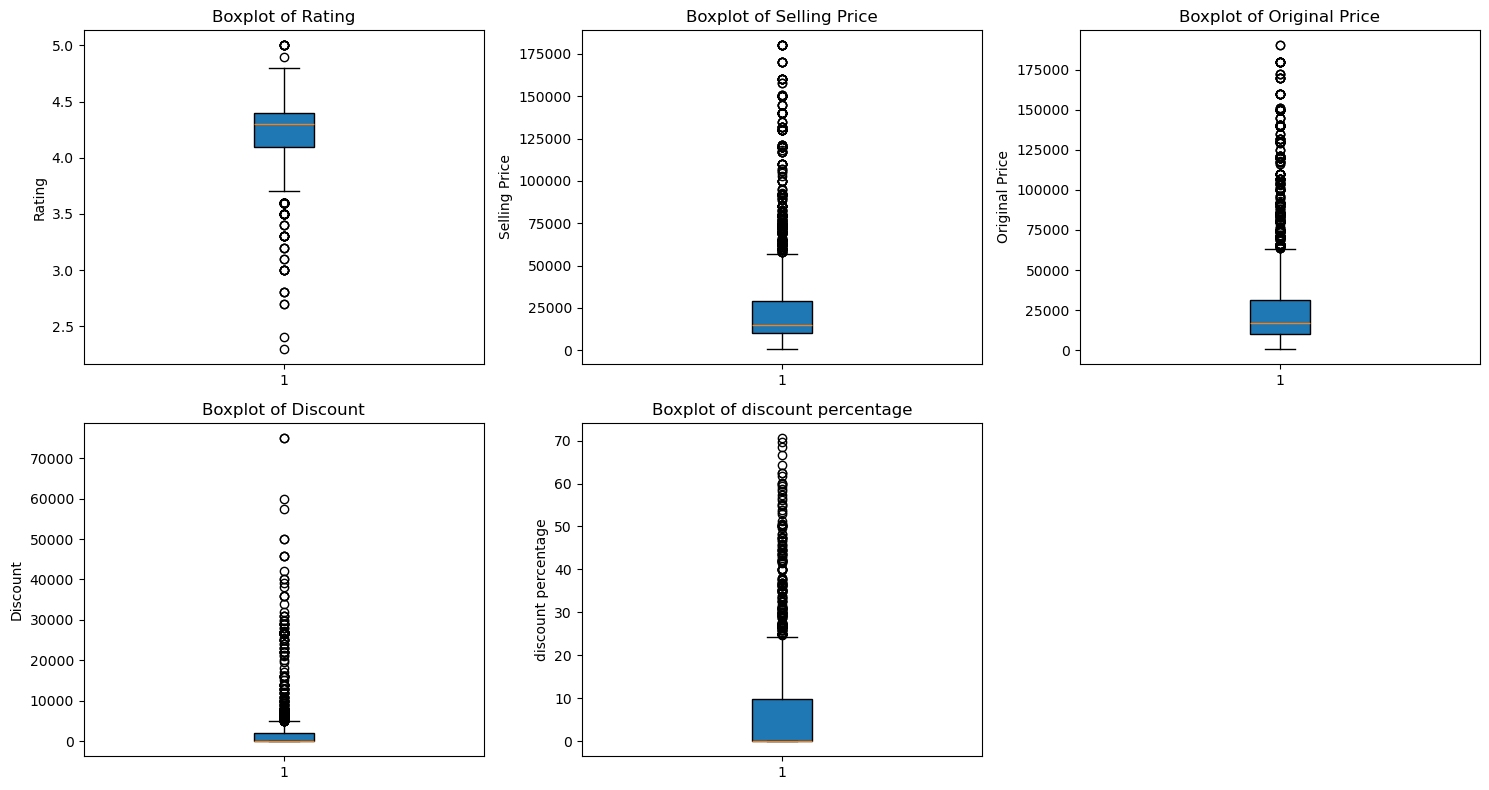

In [17]:
# Plotting boxplots for visual outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(sales[col], vert=True, patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

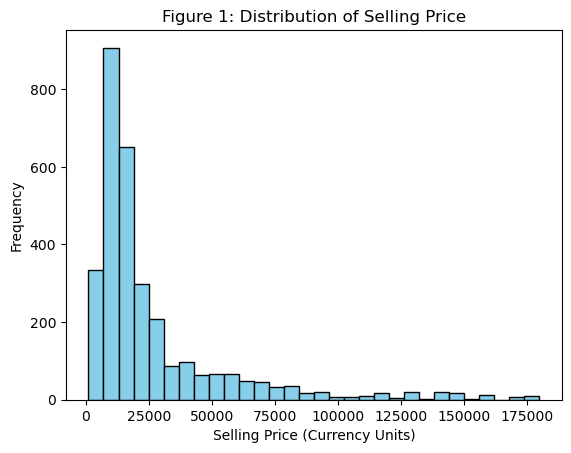

In [18]:
# Task-4 Data Exploration & Visualisation

# One variable plots

# 1. Histogram of selling Price
# This graph shows how frequently different selling prices occur. Most smartphones appear to be sold at lower prices (under $25,000), indicating a right-skewed distribution with fewer high-priced phones above $50,000. The drop-off at higher price ranges suggests premium-priced smartphones are relatively rare compared to more budget-friendly models.plt.figure(figsize=(8, 6))
plt.hist(sales['Selling Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Figure 1: Distribution of Selling Price')
plt.xlabel('Selling Price (Currency Units)')
plt.ylabel('Frequency')
plt.show()

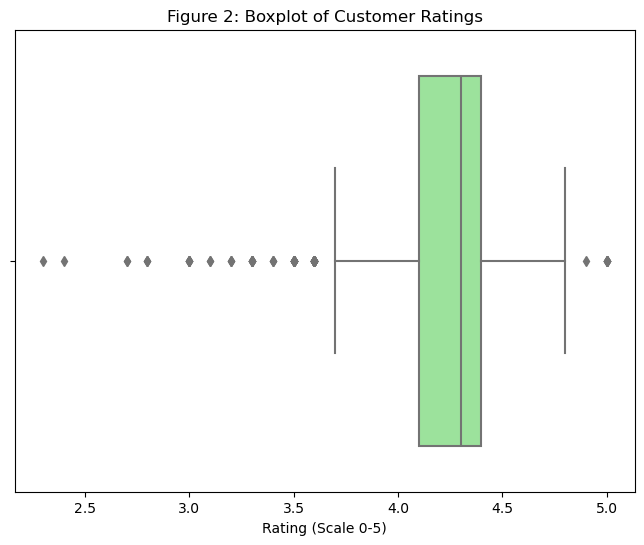

In [19]:
# 2. Box plot of rating
# This boxplot reveals that most smartphones in the dataset are rated highly, with a median around 4.3 on a 5-point scale. The tight box indicates low variability, suggesting that the majority of ratings cluster close to this high value. Few or no outliers are visible, which implies consistently positive customer feedback across the dataset.
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=sales['Rating'], color='lightgreen')
plt.title('Figure 2: Boxplot of Customer Ratings')
plt.xlabel('Rating (Scale 0-5)')
plt.show()


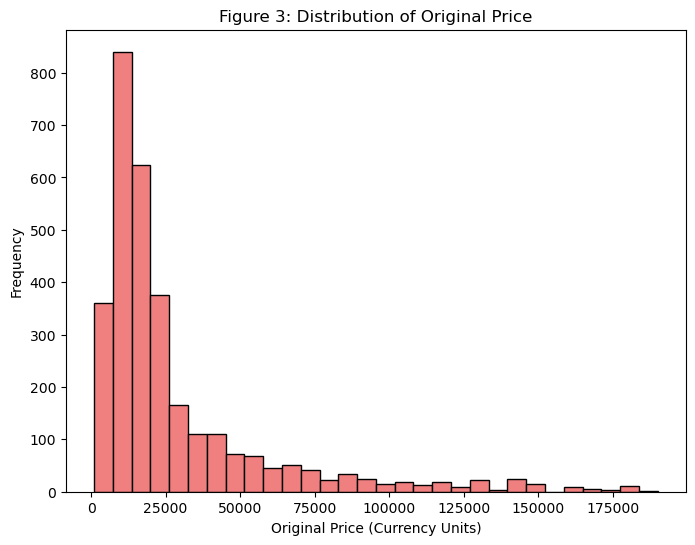

In [20]:
# 3. Histogram of Original Price
# The graph shows that most original prices fall below 25,000, with a long tail extending to higher price points. This indicates a right-skewed distribution, meaning only a few premium smartphones are listed at very high prices, while the vast majority occupy the lower and mid-range segments.
plt.figure(figsize=(8, 6))
plt.hist(sales['Original Price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Figure 3: Distribution of Original Price')
plt.xlabel('Original Price (Currency Units)')
plt.ylabel('Frequency')
plt.show()

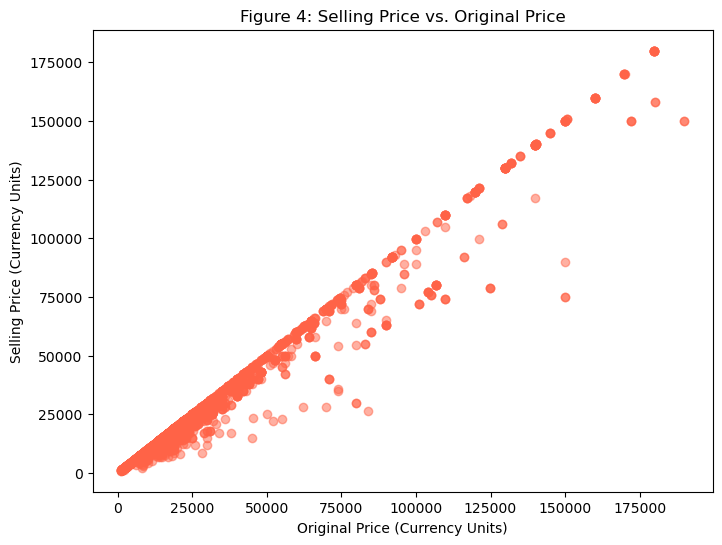

In [21]:
# Two-Variable Plots

# 1. Scatter Plot of Selling Price vs. Original Price
# This scatter plot indicates a strong positive relationship between original and selling prices. As the original price increases, the selling price generally increases as well. The close clustering around a diagonal suggests consistency in how final selling prices track their original listed values.
plt.figure(figsize=(8, 6))
plt.scatter(sales['Original Price'], sales['Selling Price'], alpha=0.5, color='tomato')
plt.title('Figure 4: Selling Price vs. Original Price')
plt.xlabel('Original Price (Currency Units)')
plt.ylabel('Selling Price (Currency Units)')
plt.show()

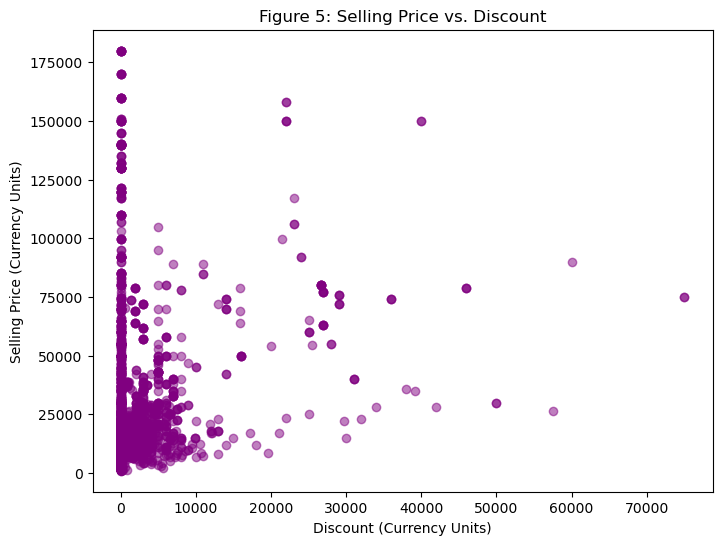

In [22]:
# 2. Scatter Plot of Selling Price vs. Discount
# This plot shows that discounts vary widely but aren not always closely tied to the final selling price. Many phones are sold with little or no discount, while some have steep discounts.
plt.figure(figsize=(8, 6))
plt.scatter(sales['Discount'], sales['Selling Price'], alpha=0.5, color='purple')
plt.title('Figure 5: Selling Price vs. Discount')
plt.xlabel('Discount (Currency Units)')
plt.ylabel('Selling Price (Currency Units)')
plt.show()

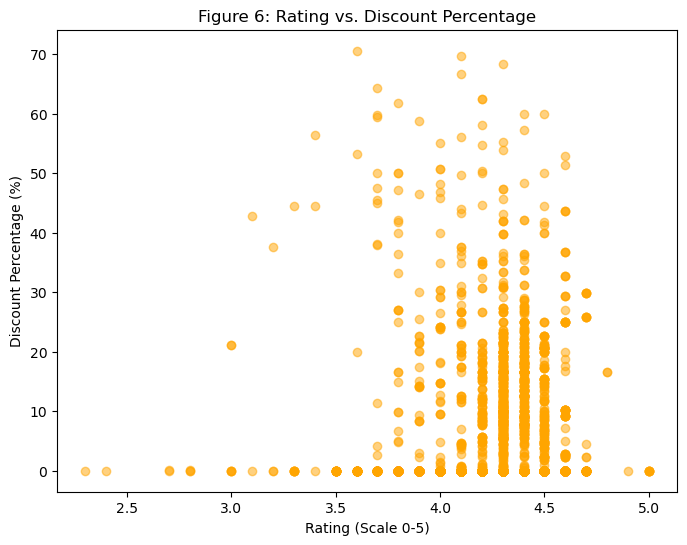

In [23]:
# 3. Scatter Plot of Rating vs. discount percentage
# This plot compares customer ratings to the discount percentage. It suggests no strong correlation highly rated phones can have anything from minimal to substantial discounts, and the same is true for lower-rated devices. This indicates that pricing strategy is not solely driven by customer ratings.
plt.figure(figsize=(8, 6))
plt.scatter(sales['Rating'], sales['discount percentage'], alpha=0.5, color='orange')
plt.title('Figure 6: Rating vs. Discount Percentage')
plt.xlabel('Rating (Scale 0-5)')
plt.ylabel('Discount Percentage (%)')
plt.show()

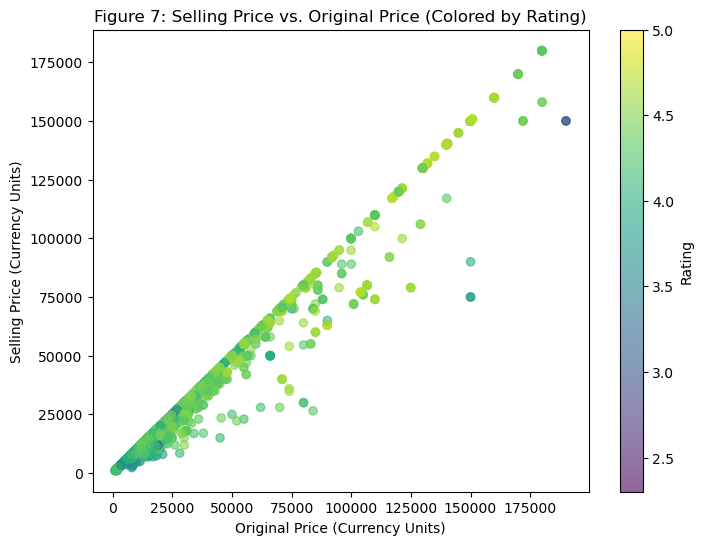

In [24]:
# Three-Variable Plots

# 1. Scatter Plot of Selling Price vs. Original Price (Colored by Rating)
# This plot shows a strong positive correlation between original and selling prices. The color scale represents customer ratings, indicating that most phones whether budget or premium cluster toward higher ratings (green to yellow). Thus, while the two prices are closely related, rating doesn’t dramatically separate cheaper phones from more expensive ones on this plot.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sales['Original Price'], sales['Selling Price'],
                      c=sales['Rating'], cmap='viridis', alpha=0.6)
plt.title('Figure 7: Selling Price vs. Original Price (Colored by Rating)')
plt.xlabel('Original Price (Currency Units)')
plt.ylabel('Selling Price (Currency Units)')
plt.colorbar(scatter, label='Rating')
plt.show()

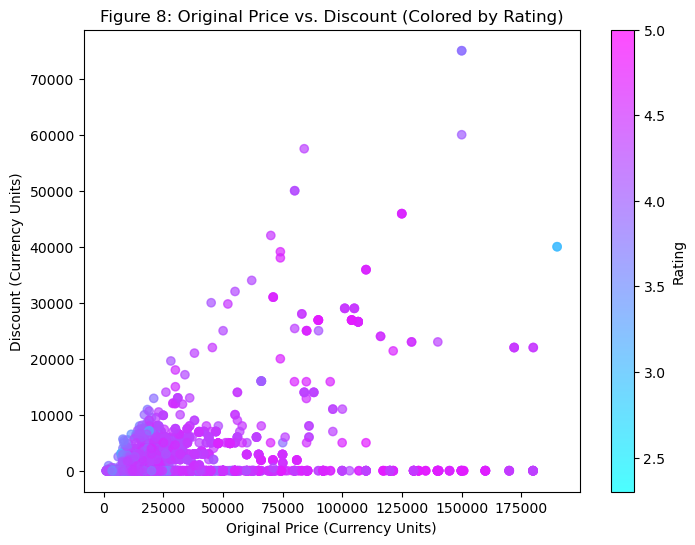

In [25]:
# 2. Scatter Plot of Selling Price vs. Discount Percentage (Marker Size by Discount)
# This plot shows the relationship between original price and discount, with marker colors representing customer ratings. It indicates that higher-priced phones may receive larger discounts, yet most phones maintain high ratings overall.
plt.figure(figsize=(8,6))
scatter3 = plt.scatter(sales['Original Price'], sales['Discount'],
                       c=sales['Rating'], cmap='cool', alpha=0.7)
plt.title('Figure 8: Original Price vs. Discount (Colored by Rating)')
plt.xlabel('Original Price (Currency Units)')
plt.ylabel('Discount (Currency Units)')
plt.colorbar(scatter3, label='Rating')
plt.show()

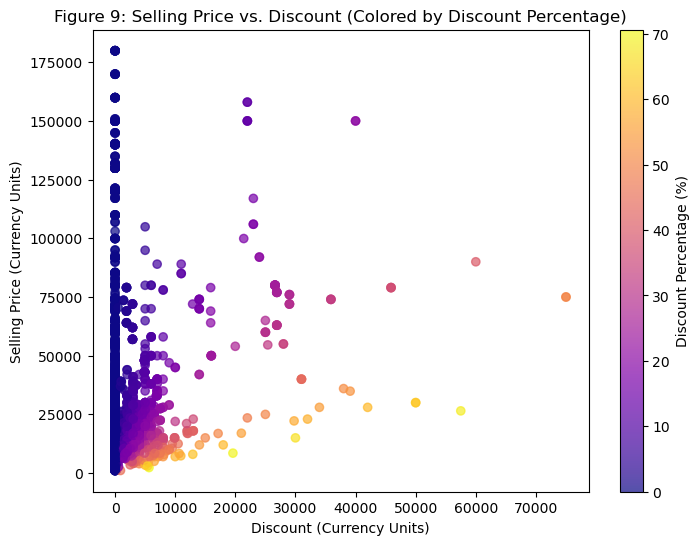

In [26]:
# 3. Selling Price vs. Discount Colored by Discount Percentage
# This plot shows selling price vs the discount amount, colored by the discount percentage. Higher discount percentages (lighter yellow dots) often occur at moderate or larger absolute discounts, but there’s no strict linear link between how much a phone is discounted and its final selling price.
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(sales['Discount'], sales['Selling Price'],
                       c=sales['discount percentage'], cmap='plasma', alpha=0.7)
plt.title('Figure 9: Selling Price vs. Discount (Colored by Discount Percentage)')
plt.xlabel('Discount (Currency Units)')
plt.ylabel('Selling Price (Currency Units)')
plt.colorbar(scatter2, label='Discount Percentage (%)')
plt.show()